## ZOMOTO

1. What type of restaurant do the majority of customers order from?
2. How many votes has each type of restaurant received from customers?
3. What are the ratings that the majority of restaurants have received
4. Zomato has observed that most couples order most of their food online. What is their average spending on each order?
5. Which mode (online or offline) has received the maximum rating?
6. Which type of restaurant received more offline orders,so that zomato can provide those customers with some good offers?

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv("D:\\Github_dataset\\Assignment\\Zomato\\Zomato.csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [43]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [ ]:
def handlerate(Value):
        value = str(value).split('/')
        value=value[0];
        return float(value)

df['rate'] = df['rate'].apply(handlerate)
print(df.head())

In [ ]:
def handlerate(value):
    try:
        # Check if the value is a string and contains '/'
        if isinstance(value, str) and '/' in value:
            # Split the string and take the first part
            value = value.split('/')[0]
            return float(value)  # Convert to float
        else:
            return None  # Return None for invalid values
    except Exception:
        return None  # Handle unexpected errors gracefully

# Apply the function to the 'rate' column
df['rate'] = df['rate'].apply(handlerate)

# Display the first few rows of the DataFrame
print(df.head())


## 1. What type of restaurant do the majority of customers order from?

C:\Users\Rajesh\AppData\Local\Temp\ipykernel_9540\3535317482.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='listed_in(type)', palette=custom_palette)


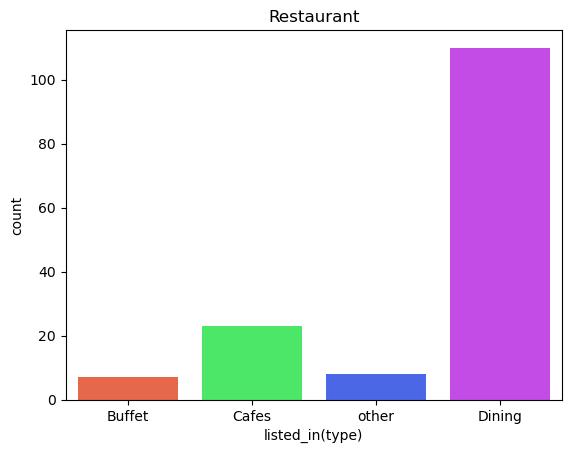

In [ ]:
custom_palette = ['#FF5733', '#33FF57', '#3357FF','#d333ff']
sns.countplot(data=df,x='listed_in(type)', palette=custom_palette)
plt.title('Restaurant')

plt.show()



In [58]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [78]:
group_type_vote

,listed_in(type),votes
0,Buffet,3028
1,Cafes,6434
2,Dining,20363
3,other,9367


## 2. How many votes has each type of restaurant received from customers?

Text(0.5, 1.0, 'Type of Restaurent')

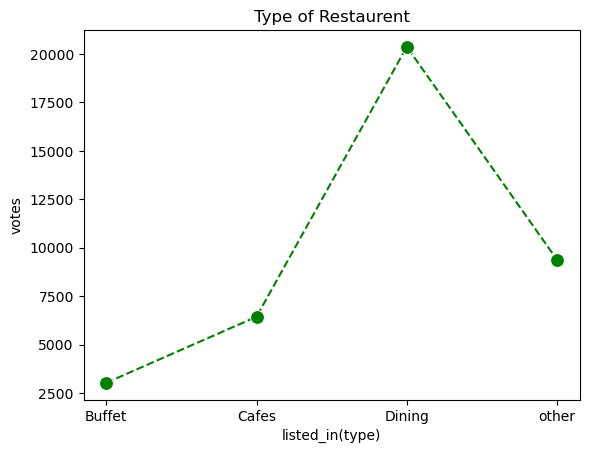

In [90]:
group_type_vote = df.groupby('listed_in(type)')['votes'].sum().reset_index()

sns.lineplot(data=group_type_vote,x='listed_in(type)',y='votes',color='green',marker='o',markersize=10,linestyle="--")
plt.title('Type of Restaurent')



Dining votes has maximum which is approx 20363

## 3. What are the ratings that the majority of restaurants have received

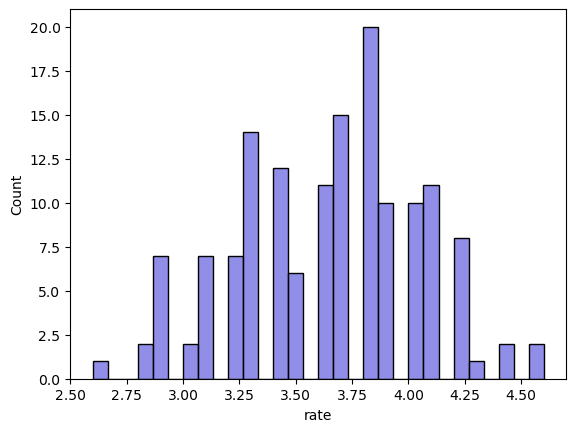

In [111]:
sns.histplot(data=df,x='rate',bins=30,color='#6b69e0')
plt.show()